In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data = pd.read_csv("dataset.csv")

In [5]:
data

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [7]:
data.shape

(205, 3)

In [13]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [15]:
data.loc[data['Sex'] == 'Male', 'Sex'] = 1
data.loc[data['Sex'] == 'Female', 'Sex'] = 0

In [17]:
data

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0
...,...,...,...
200,155.090314,77.248911,0
201,149.175907,93.231692,1
202,168.030874,63.640623,0
203,172.608090,55.189983,1


In [19]:
data.head()


,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [21]:
X = data.drop(['Sex'], axis = 1)
y = data['Sex']

In [23]:
X

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496
...,...,...
200,155.090314,77.248911
201,149.175907,93.231692
202,168.030874,63.640623
203,172.608090,55.189983


In [25]:
y

0      0
1      1
2      1
3      1
4      0
      ..
200    0
201    1
202    0
203    1
204    0
Name: Sex, Length: 205, dtype: object

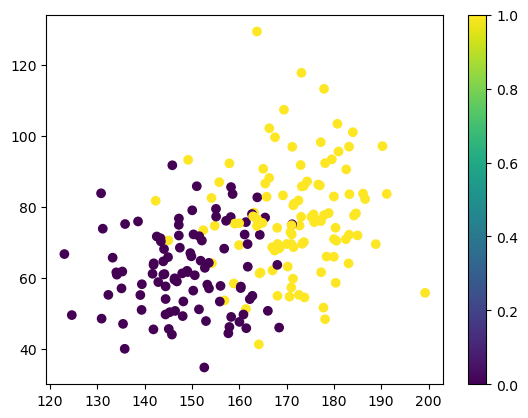

In [27]:
plt.scatter(X['Height'],X['Weight'], c=y)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)